In [1]:
"""
Group Assignment HW 3 Part 3
"""

import numpy as np
import matplotlib.pyplot as plt
import math

def calculate_LJ(r_ij):
    r6_term = math.pow(1/r_ij, 6)
    r12_term = math.pow(r6_term, 2)
    pairwise_energy = 4 * (r12_term - r6_term)
    
    return pairwise_energy 

In [2]:
def calculate_distance(coord1, coord2):
    distance = 0
    for i in range(3):
        dim_dist = (coord1[i] - coord2[i]) ** 2
        distance += dim_dist
    
    distance = math.sqrt(distance)
    return distance

In [3]:
def calculate_total_energy(coordinates):
    total_energy = 0
    num_atoms = len(coordinates)
    for i in range(num_atoms):
        for j in range(i+1, num_atoms):
            dist_ij = calculate_distance(coordinates[i], coordinates[j])
            total_energy += calculate_LJ(dist_ij)
    
    return total_energy

In [4]:
def read_xyz(filepath):
    with open(filepath) as f:
        box_length = float(f.readline().split()[0])
        num_atoms = float(f.readline())
        coordinates = f.readlines()
    atomic_coordinates = []
    
    for atom in coordinates:
        split_atoms = atom.split()
        float_coords = []
        for coord in split_atoms[1:]:
            float_coords.append(float(coord))
            
        atomic_coordinates.append(float_coords)
    
    return atomic_coordinates, box_length, num_atoms

config1_file = "C:\\xyz_file\\lj_sample_config_periodic1(1).txt"
# C:\xyz_file
# lj_sample_config_periodic1(1).txt
sample_coords, box_length, number = read_xyz(config1_file)

In [5]:
def calculate_total_pair_energy(coordinates, cutoff):
    total_energy = 0
    num_atoms = len(coordinates)

    for i in range(num_atoms):
        for j in range(i+1, num_atoms):
            dist_ij = calculate_distance(coordinates[i], coordinates[j])
            if dist_ij < cutoff:
                LJ_ij = calculate_LJ(dist_ij)
                total_energy += LJ_ij
    return total_energy

In [6]:
def tail_correction(number, box_length, cutoff):
    r3_term = (1/cutoff)**3
    r9_term = (1/3)*(r3_term**3)
    constant = 8*np.pi*(number**2)/3/(box_length**3)
    U_tail = constant *(r9_term - r3_term)
    
    return U_tail

k = calculate_total_pair_energy(sample_coords, 0.5)
print(k)

0


In [7]:
def rdf(values, max_value, bin_size,num_particles, box_length):
    """
    Calculate the radial distribution function for a set of particles.
    
    Parameters
    ----------
    values : list
        A list of particle particle distances.
    max_value : float
        The maximum value to consider for the calculation.
    bin_size : float
       The interval size, dr, for the radial distribution calculation.
    num_particles : int
        The number of particles in the system
    box_length : float
        The length of the simulation box.
    
    Returns
    -------
    bins : list
        A list of distances
    rdf : list
        A list containing the rdf values for the returned distances.
    """
    histogram = []
    bins = []
    num_bins = int(max_value / bin_size)
    
    # Get empty lists to start with
    starting = 0
    for i in range(num_bins):
        histogram.append(0)
        starting += bin_size
        bins.append(starting - bin_size/2)
    
    # First histogram the values
    for value in values:
        if value < max_value:
            hist_index = math.floor(value / bin_size)
            histogram[hist_index] += 1
    
    rdf = []
    # Normalize the values
    for i in range(num_bins):
        normalized = (histogram[i]) / (4 * math.pi * bins[i]**2 * bin_size 
                                       * num_particles ** 2 /(box_length ** 3) )
        rdf.append(normalized)
    
    return bins, rdf

In [8]:
def dis_l(coordinates):#rdf 的value
    num_atoms = len(coordinates)
    dist_list = []
    for i in range(num_atoms):
        for j in range(i+1, num_atoms):
            dist_ij = calculate_distance(coordinates[i], coordinates[j])
            dist_list.append(dist_ij)

    return dist_list

[0.005, 0.015, 0.024999999999999998, 0.035, 0.045000000000000005, 0.05500000000000001, 0.065, 0.075, 0.08499999999999999, 0.09499999999999999, 0.10499999999999998, 0.11499999999999998, 0.12499999999999997, 0.13499999999999998, 0.145, 0.155, 0.165, 0.17500000000000002, 0.18500000000000003, 0.19500000000000003, 0.20500000000000004, 0.21500000000000005, 0.22500000000000006, 0.23500000000000007, 0.24500000000000005, 0.25500000000000006, 0.26500000000000007, 0.2750000000000001, 0.2850000000000001, 0.2950000000000001, 0.3050000000000001, 0.3150000000000001, 0.3250000000000001, 0.33500000000000013, 0.34500000000000014, 0.35500000000000015, 0.36500000000000016, 0.37500000000000017, 0.3850000000000002, 0.3950000000000002, 0.4050000000000002, 0.4150000000000002, 0.4250000000000002, 0.4350000000000002, 0.44500000000000023, 0.45500000000000024, 0.46500000000000025, 0.47500000000000026, 0.48500000000000026, 0.4950000000000002, 0.5050000000000002, 0.5150000000000002, 0.5250000000000002, 0.5350000000

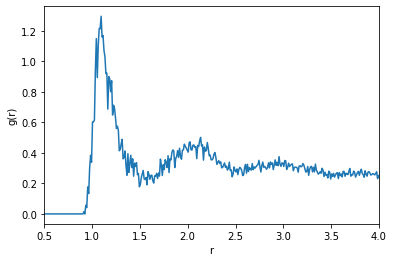

In [9]:
d_l = dis_l(sample_coords)
#print(d_l)

b, r = rdf(d_l,5, 0.01, number, box_length)
print(b)
print(r)

#plot g(r)-r
plt.plot(b, r)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.xlim([0.5, 4])
plt.show()